In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Dropout, Embedding, Conv1D, MaxPooling1D, LSTM, Bidirectional
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
import matplotlib.pyplot as plt


In [3]:
# Load and preprocess data
df = pd.read_excel('new_balanced.xlsx')
text = df['Judgment'].values.tolist()
labels = df['Label'].values.tolist()

# Convert labels to numpy array and reshape to match model output shape
labels = np.array(labels).reshape(-1, 1)

# Tokenize text
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(text)
sequences = tokenizer.texts_to_sequences(text)

# Pad sequences
max_length = max([len(seq) for seq in sequences])
padded_sequences = tf.keras.preprocessing.sequence.pad_sequences(sequences, maxlen=max_length, padding='post')

# Split data into train and test sets
train_ratio = 0.8
split_idx = int(len(padded_sequences) * train_ratio)
train_sequences = padded_sequences[:split_idx]
train_labels = labels[:split_idx]
test_sequences = padded_sequences[split_idx:]
test_labels = labels[split_idx:]

# Define model architecture
input_layer = Input(shape=(max_length,))
embedding_layer = Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=128, input_length=max_length)(input_layer)
dropout_layer = Dropout(0.2)(embedding_layer)
conv_layer = Conv1D(filters=64, kernel_size=3, activation='relu')(dropout_layer)
pooling_layer = MaxPooling1D(pool_size=2)(conv_layer)
lstm_layer = Bidirectional(LSTM(units=64, return_sequences=True))(pooling_layer)
output_layer = Dense(1, activation='sigmoid')(lstm_layer)

model = Model(inputs=input_layer, outputs=output_layer)

# Compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(train_sequences, train_labels, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate model
test_loss, test_acc = model.evaluate(test_sequences, test_labels)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)


Epoch 1/10
70/70 [==============================] - 782s 11s/step - loss: 3.3545 - accuracy: 0.1103 - val_loss: 5.6444 - val_accuracy: 0.0000e+00
Epoch 2/10
70/70 [==============================] - 880s 13s/step - loss: 1.1210 - accuracy: 0.1112 - val_loss: 5.7692 - val_accuracy: 0.0000e+00
Epoch 3/10
70/70 [==============================] - 945s 14s/step - loss: 0.3032 - accuracy: 0.1112 - val_loss: 6.1780 - val_accuracy: 0.0000e+00
Epoch 4/10
70/70 [==============================] - 957s 14s/step - loss: 0.1311 - accuracy: 0.1112 - val_loss: 6.0349 - val_accuracy: 0.0000e+00
Epoch 5/10
70/70 [==============================] - 962s 14s/step - loss: 0.0817 - accuracy: 0.1112 - val_loss: 5.7707 - val_accuracy: 0.0000e+00
Epoch 6/10
70/70 [==============================] - 908s 13s/step - loss: 0.0511 - accuracy: 0.1112 - val_loss: 6.0400 - val_accuracy: 0.0000e+00
Epoch 7/10
70/70 [==============================] - 869s 12s/step - loss: 0.0486 - accuracy: 0.1112 - val_loss: 5.5942 - val

In [8]:
model.save('trained_model_lstm.h5')

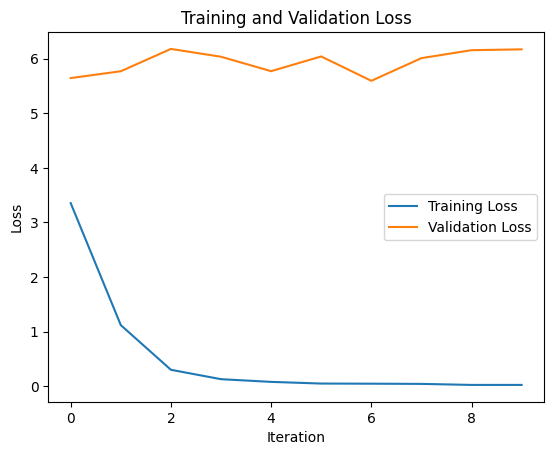

In [4]:
plt.plot(history.history['loss'], label="Training Loss")
plt.plot(history.history['val_loss'], label="Validation Loss") 
plt.title("Training and Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()
plt.show() 

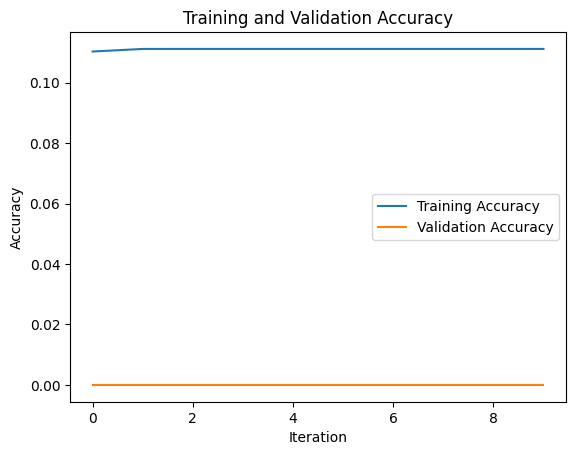

In [5]:
plt.plot(history.history['accuracy'], label="Training Accuracy") 
plt.plot(history.history['val_accuracy'], label="Validation Accuracy") 
plt.title("Training and Validation Accuracy")
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.legend()
plt.show() 

In [6]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 5933)]            0         
                                                                 
 embedding (Embedding)       (None, 5933, 128)         2873216   
                                                                 
 dropout (Dropout)           (None, 5933, 128)         0         
                                                                 
 conv1d (Conv1D)             (None, 5931, 64)          24640     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 2965, 64)         0         
 )                                                               
                                                                 
 bidirectional (Bidirectiona  (None, 2965, 128)        66048     
 l)                                                          